# Machine Learning
## Assignment 2: Bayesian Decision Theory and Parametric Estimation
Wilson Andres Piravaguen Serrano (wapiravaguens)

Luis Fernando Castro Peralta (lfcastrop)

Load the Iris dataset from sklearn and create a dataset using only the Petal Width and Sepal
Width attributes. Plot the resulting dataset assigning a different color to each class.

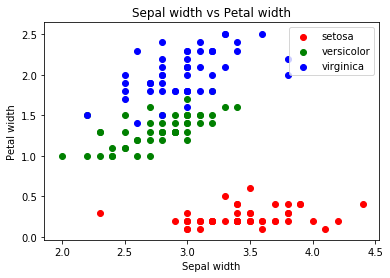

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris, make_spd_matrix 
from scipy.stats import multivariate_normal
from matplotlib import colors as c
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support


# Load iris data set
iris = load_iris()
x = iris.data[:,[1, 3]] # Select columns 1(Sepal width) and 3(Petal width)
y = iris.target
target_values = sorted(list(set(iris.target)))
target_names = iris.target_names

# Plot Sepal width vs Petal width, different color for each class
plt.clf()
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(x[y == target_value, 0], x[y == target_value, 1], color=color, label=target_name)
plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='best', scatterpoints=1)
plt.show()

1. a) Calculate the parameters of the probability distribution functions for the three classes

In [3]:
# Mean of the data
mean = np.array([ np.mean(x[y == i],axis = 0) for i in range(3)])

# Probability of each class
Pc = [ len(y[y == i])/len(y) for i in range(3)]

# Covariance Matrix
sigma = np.zeros(3)
for i in range (3):
    for j in range(len(x[y == i])):
        xj = x[y == i][j]        
        sigma[i] += (xj[0] - mean[i][0]) ** 2
        sigma[i] += (xj[1] - mean[i][1]) ** 2
    sigma[i] /= len(x[y == i]) * 2
sigma = np.sum(sigma * Pc)
covariance = np.eye(2) * sigma

print("x1: Sepal Width, x2: Petal Width")
print("Mean for each class: ")
for i in range(3):    
    print("\tMean of " + target_names[i] + ": " , end='\t') 
    print(mean[i])
print("Covariance Matrix: ")
print(covariance)

x1: Sepal Width, x2: Petal Width
Mean for each class: 
	Mean of setosa: 	[3.428 0.246]
	Mean of versicolor: 	[2.77  1.326]
	Mean of virginica: 	[2.974 2.026]
Covariance Matrix: 
[[0.077062 0.      ]
 [0.       0.077062]]


1. b) Write a different Python functions that calculate the discriminant function for each class.

In [4]:
# Array with the probability distribution functions for the three classes.
df = [multivariate_normal(mean = mean[i], cov = covariance) for i in range(3)] 

# Function of p(X|Ck)
def Pxc(x,k):
    return df[k].pdf(x)

# Discriminant function for the class k
def gk(x,k):
    # P(X) = Σ P(X|Ck)*P(Ck)
    Px = np.sum([Pxc(x,i)*Pc[i] for i in range(3)])
    # Bayes' theorem: P(ck|X) = p(X|Ck)*P(Ck) / P(X)
    Pcx = (Pxc(x,k)*Pc[k])/(Px)
    return Pcx

# Discriminant function 
def g(x):
    return np.argmax([gk(x,i) for i in range(3)])

1. c) Draw a plot, where the regions corresponding to the different classes are shown with different colors

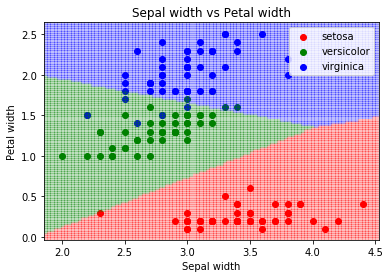

In [5]:
# Plot Sepal width vs Petal width, different color for each class
plt.clf()
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(x[y == target_value, 0], x[y == target_value, 1], color=color, label=target_name)
plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='best', scatterpoints=1)

# Plot the region corresponding to each class
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min, x_max, nx)
yy = np.linspace(y_min, y_max, ny)
z0 = [[g([xx[i],yy[j]]) for i in range(len(xx))] for j in range(len(yy))]
cMap = c.ListedColormap(['r','g','b'])
plt.pcolormesh(xx,yy,z0,cmap=cMap,alpha = 0.25)
plt.show()

1. d) The boundary between class regions must be a line. Calculate the equation of these lines clearly explaining the deduction process. Draw the lines along with the regions.

### Explanation:
The discrimination function g (x) chooses the class k whose $P(C_k|x) > P(Ci|x)$   $∀$    $ i \neq k$ 
At the border of the regions of discrimination between two classes $ C_0 $ and $ C_1 $ is true:
\begin{align} 
P(C_0|x) &= P(C_1|x)\\
\frac{P(x|C_0)P(C_0)}{P(x)} &= \frac{P(x|C_1)P(C_1)}{P(x)}\\
P(x|C_0)P(C_0) &= P(x|C_1)P(C_1)\\
\end{align}

Replacing by the probability density function, in the specific case $ \ Sigma = \ sigma I $

\begin{align} 
\frac{1}{2 \pi \sigma * \sqrt{1- \rho }} e^{-\frac{1}{2(1-\rho^2)}\bigl[\frac{(x-\mu_{c_0x})^2}{\sigma} + \frac{(y-\mu_{c_0y})^2}{\sigma} +\frac{2\rho(x-\mu_{c_0x})(y-\mu_{c_0y})}{\sigma}\bigr]}  P(C_0) &= \frac{1}{2 \pi \sigma* \sqrt{1- \rho }} e^{-\frac{1}{2(1-\rho^2)}\bigl[\frac{(x-\mu_{c_1x})^2}{\sigma} + \frac{(y-\mu_{c_1y})^2}{\sigma} +\frac{2\rho(x-\mu_{c_1x})(y-\mu_{c_1y})}{\sigma}\bigr]}  P(C_1)
\end{align}

Simplifying $ \ rho = 0 $

\begin{align} 
e^{-\frac{1}{2\sigma}\bigl[(x-\mu_{c_0x})^2+ (y-\mu_{c_0y})^2 \bigr]}  P(C_0) &= e^{-\frac{1}{2\sigma}\bigl[(x-\mu_{c_1x})^2+ (y-\mu_{c_1y})^2 \bigr]}  P(C_1)
\end{align}

Take the logarithm of both sides
\begin{align} 
-\frac{1}{2\sigma}\bigl[(x-\mu_{c_0x})^2+ (y-\mu_{c_0y})^2 \bigr] + ln(P(C_0))&= -\frac{1}{2\sigma}\bigl[(x-\mu_{c_1x})^2+ (y-\mu_{c_1y})^2 \bigr]+ ln(P(C_1))
\end{align}


Expanding polynomial factors

\begin{align} 
-\frac{1}{2\sigma}\bigl[ \mu_{c_0x}(\mu_{c_0x} - 2x) + \mu_{c_0y}(\mu_{c_0y} - 2y) + x^2 + y^2  \bigr] + ln(P(C_0))&= -\frac{1}{2\sigma}\bigl[ \mu_{c_0x}(\mu_{c_1x} - 2x) + \mu_{c_1y}(\mu_{c_1y} - 2y) + x^2 + y^2  \bigr]+ ln(P(C_1))
\end{align}

Simplifying 

\begin{align} 
-\frac{1}{2\sigma}\bigl[ \mu_{c_0x}(\mu_{c_0x} - 2x) + \mu_{c_0y}(\mu_{c_0y} - 2y)\bigr] + ln(P(C_0))&= -\frac{1}{2\sigma}\bigl[ \mu_{c_0x}(\mu_{c_1x} - 2x) + \mu_{c_1y}(\mu_{c_1y} - 2y)\bigr]+ ln(P(C_1))
\end{align}

Solve equation for y:

\begin{align} 
y &= \frac{ \mu_{c_0x}^2 - 2\mu_{c_0x}x + \mu_{c_0y}^2 - \mu_{c_1x}^2 + 2\mu_{c_1x}x - \mu_{c_1y}^2 + 2ln(P(C_1))\sigma - 2ln(P(C_0))\sigma  }{2(\mu_{c_0y} - \mu_{c_1y})}
\end{align}



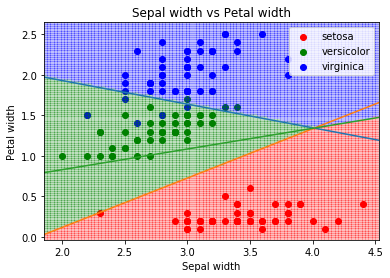

In [6]:
# Function of the line between class regions c0 and c1
def line(x, c0, c1):
    a, b = mean[c0] # a=uc0x, b=uc0y
    c, d = mean[c1] # c=uc1x, d=uc1y
    return (a*a - 2*a*x + b*b - c*c + 2*c*x - d*d + 2*np.log(Pc[c1])*sigma - 2*np.log(Pc[c0])*sigma) / (2*(b-d))

# Plot Sepal width vs Petal width, different color for each class
plt.clf()
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(x[y == target_value, 0], x[y == target_value, 1], color=color, label=target_name)
plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='best', scatterpoints=1)

# Plot the region corresponding to each class
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min, x_max, nx)
yy = np.linspace(y_min, y_max, ny)
z0 = [[g([xx[i],yy[j]]) for i in range(len(xx))] for j in range(len(yy))]
cMap = c.ListedColormap(['r','g','b'])
plt.pcolormesh(xx,yy,z0,cmap=cMap,alpha = 0.25)

# Plot the lines
plt.plot(xx, line(xx, 1, 2))
plt.plot(xx, line(xx, 1, 0))
plt.plot(xx, line(xx, 0, 2))
plt.show()

1. (e) What happens with the boundary lines if we change the prior probabilities of the classes? Illustrate with a graphical example.

Rta: The regions that increased their a priori probability also increased their area

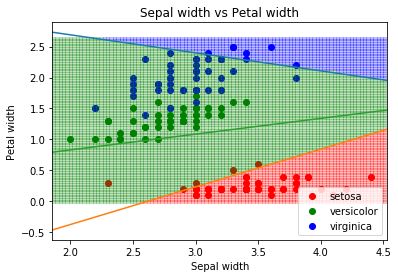

In [7]:
# Changing the prior probabilities to illustrate the changes of the boundary lines
Pc = [0.001, 0.998, 0.001]

# Plot Sepal width vs Petal width, different color for each class
plt.clf()
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(x[y == target_value, 0], x[y == target_value, 1], color=color, label=target_name)
plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='best', scatterpoints=1)

# Plot the region corresponding to each class
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min, x_max, nx)
yy = np.linspace(y_min, y_max, ny)
z0 = [[g([xx[i],yy[j]]) for i in range(len(xx))] for j in range(len(yy))]
cMap = c.ListedColormap(['r','g','b'])
plt.pcolormesh(xx,yy,z0,cmap=cMap,alpha = 0.25)

# Plot the lines
plt.plot(xx, line(xx, 1, 2))
plt.plot(xx, line(xx, 1, 0))
plt.plot(xx, line(xx, 0, 2))
plt.show()

# Recalculate P(C)
Pc = [ len(y[y == i])/len(y) for i in range(3)]

2. (a) Write again Python functions that calculate the discriminant function for each class, but now, taking into account the possibility of rejection with a cost λ and cost 1 for misclassification 

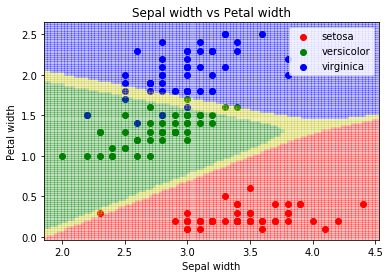

In [8]:
# λ that produce a rejection region distinguishable from the other regions
lamnda = 0.35

# Discriminant function with possibility of rejection
def g_lambda(x):
    i = np.argmax([gk(x, k) for k in range(3)])
    if (gk(x,i) > 1 - lamnda):
        return i # Choose class i
    else:
        return 3 # Rejection

# Plot Sepal width vs Petal width, different color for each class 
plt.clf()
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(x[y == target_value, 0], x[y == target_value, 1], color=color, label=target_name)
plt.title('Sepal width vs Petal width')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='best', scatterpoints=1)

# Plot the region corresponding to each class and the rejection region
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min, x_max, nx)
yy = np.linspace(y_min, y_max, ny)
z0 = [[g_lambda([xx[i],yy[j]]) for i in range(len(xx))] for j in range(len(yy))]
cMap = c.ListedColormap(['r','g','b','y'])
plt.pcolormesh(xx,yy,z0,cmap=cMap,alpha = 0.25)
plt.show()

3. a) The covariance matrix could be an arbitrary matrix (not diagonal) and different for each class.

In [18]:
# Covariance matrix arbitrarily generated for each class
covariance = [make_spd_matrix(2)*0.5 for i in range(3)]

3. b) Use only a portion of the dataset (80% of the samples) to estimate the parameters of the probability distribution functions of each class. Print the values of the parameters for each class

In [19]:
# Split the data set into training(80% of the samples) and testing(20% of the samples)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

# Mean of the training data
mean = np.array([ np.mean(xTrain[yTrain == i],axis = 0) for i in range(3)])

# Probability of each class of the training data
Pc = [ len(yTrain[yTrain == i])/len(yTrain) for i in range(3)]

# Array with the probability distribution functions for the three classes
df = [multivariate_normal(mean = mean[i], cov = covariance[i]) for i in range(3)] 

print("x1: Sepal Width, x2: Petal Width")
print("Mean for each class: ")
for i in range(3):    
    print("\tMean of " + target_names[i] + ": " , end='\t') 
    print(mean[i])
print("Covariance Matrix for each class: ")
for i in range(3):    
    print("\tCovariance Matrix of " + target_names[i] + ": " ) 
    print("", end='\t\t')
    print(covariance[i][0])
    print("", end='\t\t')
    print(covariance[i][1])

x1: Sepal Width, x2: Petal Width
Mean for each class: 
	Mean of setosa: 	[3.45714286 0.23809524]
	Mean of versicolor: 	[2.77027027 1.30810811]
	Mean of virginica: 	[2.98292683 2.03658537]
Covariance Matrix for each class: 
	Covariance Matrix of setosa: 
		[1.24179256 0.3620356 ]
		[0.3620356  0.52687168]
	Covariance Matrix of versicolor: 
		[0.90679859 0.37548254]
		[0.37548254 0.23864384]
	Covariance Matrix of virginica: 
		[0.96429106 0.31256543]
		[0.31256543 0.18042461]


3. c) Classify the rest of the dataset that was not used for estimation (20%), using a classifier based on the discriminant functions. Evaluate the results using a confusion matrix.

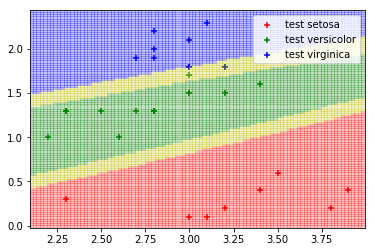

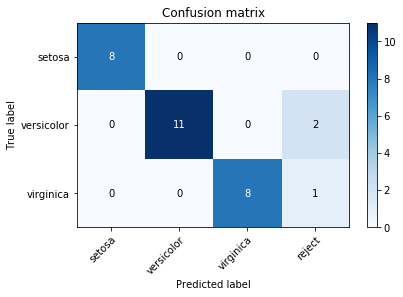

In [20]:
# Plot Test data and region corresponding to each class
for target_value, target_name, color in zip(target_values, target_names, ['red', 'green', 'blue']):
    plt.scatter(xTest[yTest == target_value, 0], xTest[yTest == target_value, 1], color=color, label="test "+ target_name,  marker='+')
plt.legend(loc='best', scatterpoints=1)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min, x_max, nx)
yy = np.linspace(y_min, y_max, ny)
z0 = [[g_lambda([xx[i],yy[j]]) for i in range(len(xx))] for j in range(len(yy))]
cMap = c.ListedColormap(['r','g','b','y'])
plt.pcolormesh(xx,yy,z0,cmap=cMap,alpha = 0.25)
plt.show()

# Make prediction using the Test data
y_pred = [g_lambda(xTest[i]) for i in range(len(xTest)) ]

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    title = 'Confusion matrix'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred,labels = range(4))
    cm = cm [:-1]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(yTest, y_pred, classes=['setosa','versicolor','virginica','reject'],
                      title='Confusion matrix, without normalization')

plt.show()

In [21]:
cm = confusion_matrix(yTest, y_pred)
accuracy  = 0
for i in range(3):
    accuracy  += cm[i,i]
accuracy  /= len(yTest)

FP = (cm.sum(axis=0) - np.diag(cm))[0:3]
FN = (cm.sum(axis=1) - np.diag(cm))[0:3]
TP = np.diag(cm)[0:3]
TN = cm.sum() - (FP + FN + TP) 

# Sensitivity, hit rate
TPR = TP/(TP+FN) 

# Precision or positive predictive value 
PPV = TP/(TP+FP) 

# Accuracy of each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Accuracy  of the classifier")
print("\t" + str(accuracy ))
print()
for i in range(3):
    print("Sensitivity of the class " + target_names[i] + ": ",end="\t")
    print(TPR[i])
    print("Precision of the class " + target_names[i] + ":   ",end="\t")
    print(PPV[i])
    print("Accuracy of the class " + target_names[i] + ":   ",end="\t")
    print(ACC[i])
    print()

Accuracy  of the classifier
	0.9

Sensitivity of the class setosa: 	1.0
Precision of the class setosa:   	1.0
Accuracy of the class setosa:   	1.0

Sensitivity of the class versicolor: 	0.8461538461538461
Precision of the class versicolor:   	1.0
Accuracy of the class versicolor:   	0.9333333333333333

Sensitivity of the class virginica: 	0.8888888888888888
Precision of the class virginica:   	1.0
Accuracy of the class virginica:   	0.9666666666666667

